# Get data

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

housing = pd.read_csv("london/housing.csv")

In [4]:
housing.head()

,room_type,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude
0,Shared room,Hackney,Shacklewell,0,0.0,4,1,128,51.552269,-0.071100
1,Shared room,Brent,Brondesbury Park,11,3.5,12,1,49,51.545518,-0.210591
2,Shared room,Brent,Brondesbury Park,3,3.5,12,1,54,51.546369,-0.208591
3,Shared room,Lewisham,Brockley,14,4.0,6,1,58,51.473402,-0.028555
4,Shared room,Camden,St. Pancras and Somers Town,0,0.0,4,1,36,51.531570,-0.131913


In [5]:
housing.describe()

,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude
count,53947.000000,53947.000000,53947.000000,53947.000000,53947.000000,53947.000000,53947.000000
mean,12.196434,2.334995,3.083471,1.362504,120.618959,51.510498,-0.126275
std,25.544006,2.329791,1.925200,0.847126,134.630355,0.044630,0.084986
min,0.000000,0.000000,1.000000,0.000000,10.000000,51.322634,-0.414114
25%,0.000000,0.000000,2.000000,1.000000,53.000000,51.485676,-0.186777
50%,3.000000,3.500000,2.000000,1.000000,90.000000,51.514515,-0.122526
75%,12.000000,4.500000,4.000000,2.000000,146.000000,51.538620,-0.069465
max,389.000000,5.000000,16.000000,10.000000,8782.000000,51.683101,0.210972


Lots of listings are without a review which makes the overall_satisfaction feature inaccurate. We can replace the overall_satisfaction of those with no reviews by the overall mean. 

In [6]:
housing.loc[housing.reviews == 0, 'overall_satisfaction'] = 2.335

In [7]:
housing.describe()

,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude
count,53947.000000,53947.000000,53947.000000,53947.000000,53947.000000,53947.000000,53947.000000
mean,12.196434,3.030730,3.083471,1.362504,120.618959,51.510498,-0.126275
std,25.544006,1.821897,1.925200,0.847126,134.630355,0.044630,0.084986
min,0.000000,0.000000,1.000000,0.000000,10.000000,51.322634,-0.414114
25%,0.000000,2.335000,2.000000,1.000000,53.000000,51.485676,-0.186777
50%,3.000000,3.500000,2.000000,1.000000,90.000000,51.514515,-0.122526
75%,12.000000,4.500000,4.000000,2.000000,146.000000,51.538620,-0.069465
max,389.000000,5.000000,16.000000,10.000000,8782.000000,51.683101,0.210972


In [8]:
housing["borough"].value_counts()

Tower Hamlets             5535
Westminster               5527
Hackney                   4666
Camden                    3830
Kensington and Chelsea    3656
Islington                 3612
Southwark                 3455
Lambeth                   3289
Hammersmith and Fulham    2860
Wandsworth                2726
Brent                     1563
Lewisham                  1522
Haringey                  1521
Newham                    1151
Ealing                    1048
Barnet                     970
Greenwich                  922
Waltham Forest             905
Richmond upon Thames       886
Merton                     778
Hounslow                   625
Croydon                    510
Redbridge                  377
Bromley                    369
Kingston upon Thames       308
City of London             307
Enfield                    285
Harrow                     239
Barking and Dagenham       153
Sutton                     133
Bexley                     105
Hillingdon                  59
Havering

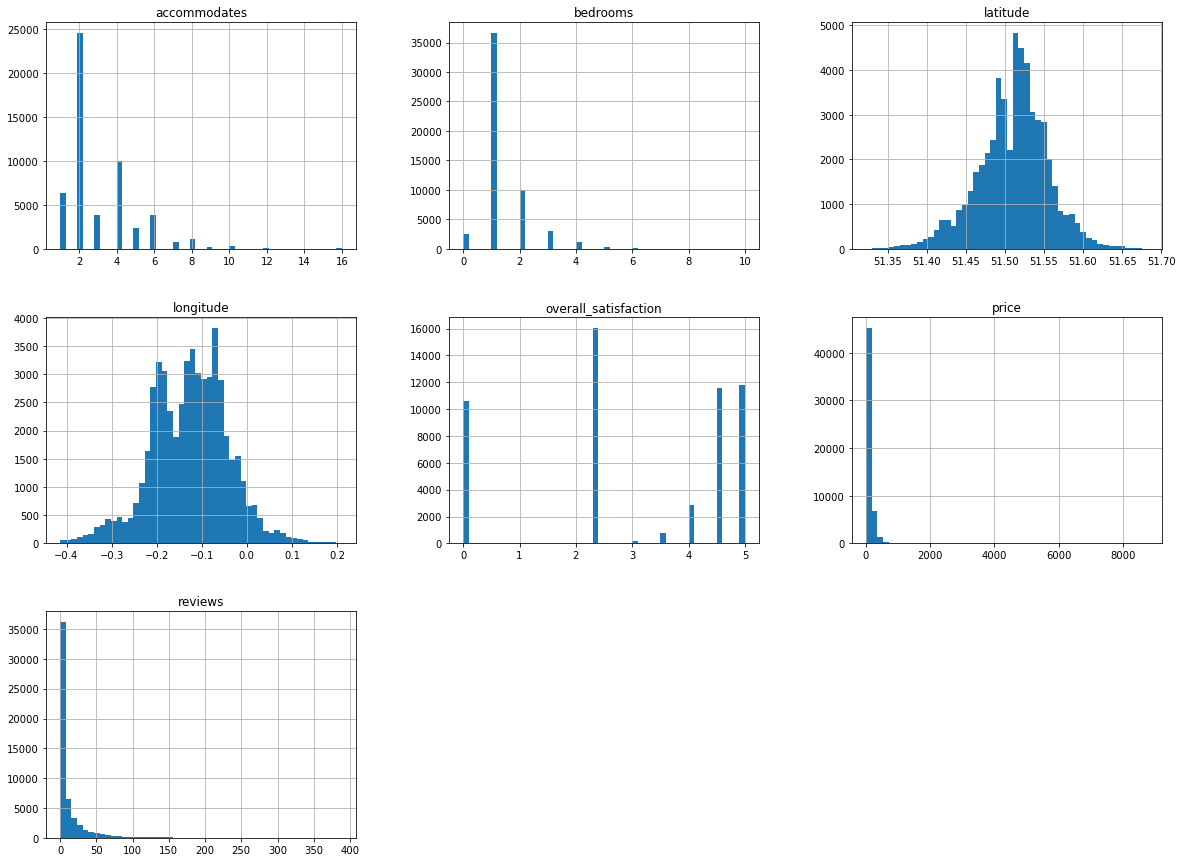

In [9]:
housing.hist(bins=50, figsize=(20,15))
plt.savefig("histogram")
plt.show()

# Create test set

In [10]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [11]:
housing["accom_cat"] = housing["accommodates"]

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

#stratifying sample
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["accom_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [13]:
housing["accom_cat"].where(housing["accom_cat"] < 12, 12, inplace=True)

In [14]:
housing["accom_cat"].value_counts() / len(housing)

2     0.455614
4     0.186683
1     0.118598
6     0.072052
3     0.071719
5     0.043988
8     0.021688
7     0.014607
10    0.005468
12    0.004820
9     0.003967
11    0.000797
Name: accom_cat, dtype: float64

In [15]:
def accom_cat_proportions(data):
    return data["accom_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": accom_cat_proportions(housing),
    "Stratified": accom_cat_proportions(strat_test_set),
    "Random": accom_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [16]:
compare_props

,Overall,Random,Stratified,Rand. %error,Strat. %error
1,0.118598,0.114365,0.118628,-3.568976,0.025697
2,0.455614,0.457183,0.455607,0.344312,-0.001492
3,0.071719,0.070899,0.071733,-1.142742,0.020284
4,0.186683,0.189157,0.186654,1.324918,-0.015490
5,0.043988,0.041242,0.044022,-6.242045,0.078716
6,0.072052,0.072567,0.072011,0.714749,-0.057011
7,0.014607,0.015292,0.014643,4.689610,0.248232
8,0.021688,0.024189,0.021687,11.532259,-0.005561
9,0.003967,0.004541,0.003985,14.479615,0.461703
10,0.005468,0.005375,0.005468,-1.700382,-0.005561


In [17]:
#removing accom_cat to get back original data
for set_ in (strat_train_set, strat_test_set):
    set_.drop("accom_cat", axis=1, inplace=True)

# Visualizing data

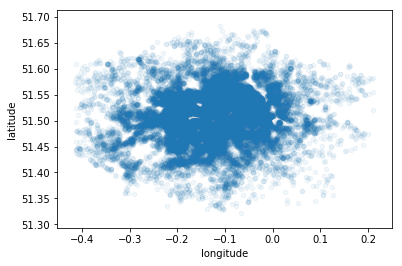

In [18]:
housing = strat_train_set.copy()
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.06)
plt.savefig("visualization_plot")

In [19]:
#merging all pricing > 300 into 
housing["price"].where(housing["price"] < 300, 300, inplace=True)

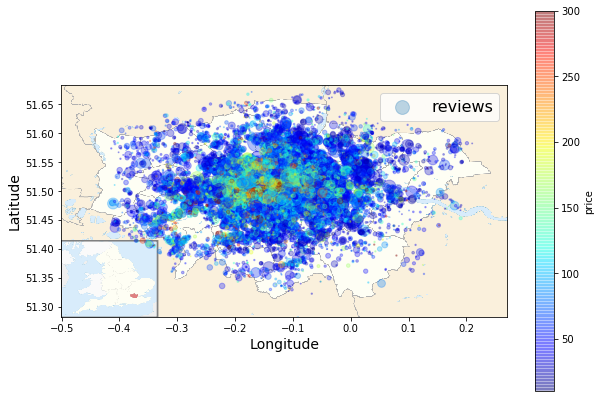

In [20]:
import matplotlib.image as mpimg
london_img=mpimg.imread('london_map.png')
ax = housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.3,
    s=housing["reviews"], label="reviews", figsize=(10,7),
    c="price", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.imshow(london_img, extent=[-0.50114, 0.270972, 51.282634, 51.683101], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["price"]
tick_values = np.linspace(prices.min(), prices.max(),11)


plt.legend(fontsize=16)
plt.savefig("london_prices_plot")
plt.show()

In [21]:
corr_matrix = housing.corr()
corr_matrix["price"].sort_values(ascending=False)

price                   1.000000
accommodates            0.671576
bedrooms                0.597944
overall_satisfaction   -0.006971
reviews                -0.028372
latitude               -0.035392
longitude              -0.149549
Name: price, dtype: float64

### Combining attributes:


In [22]:
housing["accom_per_room"] = housing["accommodates"]/housing["bedrooms"]
housing["delta_to_downtown"] = np.absolute(housing["latitude"] - 51.5) + np.absolute(housing["longitude"] + 0.17)

corr_matrix = housing.corr()
corr_matrix["price"].sort_values(ascending=False)

price                   1.000000
accommodates            0.671576
bedrooms                0.597944
accom_per_room          0.208695
overall_satisfaction   -0.006971
reviews                -0.028372
latitude               -0.035392
longitude              -0.149549
delta_to_downtown      -0.329940
Name: price, dtype: float64

we see that the new delta_to_downtown is much more correlated than latitude and longitude by themselves.

### Handling Text Attributes

as most ML algorithms prefer numbers, we can convert these text labels into numbers as one-hot encodings

In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer

encoder = LabelEncoder()
hot = OneHotEncoder()
binary = LabelBinarizer()

housing_cat = housing["borough"]
housing_cat_encoded = encoder.fit_transform(housing_cat)

housing_cat_hot = hot.fit_transform(housing_cat_encoded.reshape(-1,1))

housing_cat_hot.toarray()

housing_cat_hot = binary.fit_transform(housing_cat)

### Feature Scaling

we need to create a class to select numerical or text columns as sklearn doesn't support DataFrames yet

In [39]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

housing_num = housing.drop("borough", axis=1)
housing_num = housing_num.drop("room_type", axis = 1)
housing_num = housing_num.drop("neighborhood", axis = 1)

num_attributes = list(housing_num)
cat_attributes = ["borough", "room_type", "neighborhood"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attributes)),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attributes)),
        ('label_binarizer', LabelBinarizer()),
    ])

In [44]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [52]:
housing[~housing.isin([np.nan, np.inf, -np.inf]).any(1)]


,room_type,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude,accom_per_room,delta_to_downtown
19303,Entire home/apt,Southwark,Cathedrals,2,0.000,3,1,114,51.501178,-0.100804,3.000000,0.070374
22861,Entire home/apt,Islington,Canonbury,12,5.000,2,1,102,51.537711,-0.086680,2.000000,0.121031
3178,Entire home/apt,City of London,City of London,4,4.500,6,2,300,51.510722,-0.084509,3.000000,0.096213
2117,Entire home/apt,Hammersmith and Fulham,Palace Riverside,2,0.000,8,3,300,51.468064,-0.208936,2.666667,0.070872
16563,Entire home/apt,Islington,Canonbury,1,0.000,2,1,127,51.541741,-0.089371,2.000000,0.122370
31577,Private room,Brent,Queens Park,1,0.000,2,1,90,51.529176,-0.216172,2.000000,0.075348
23548,Entire home/apt,Lewisham,New Cross,7,5.000,4,1,96,51.481205,-0.042158,4.000000,0.146637
53529,Private room,Newham,Green Street West,13,4.500,2,1,29,51.543588,0.028156,2.000000,0.241744
707,Shared room,Haringey,West Green,0,2.335,2,1,38,51.594728,-0.083784,2.000000,0.180944
42494,Private room,Southwark,South Camberwell,14,4.000,2,1,45,51.466938,-0.088049,2.000000,0.115013
